In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
import sys
import os

import Binary_reader

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from scipy.linalg import svd
from sklearn.linear_model import SGDRegressor, LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_validate
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [70]:
folder_path = "/home/torps/CommSense/Active/Data/Location_Test_Data/"
complete_data, original_data = Binary_reader.get_pandas_dataFrame(folder_path)
complete_data

,0,1,2,3,4,5,6,7,8,9,...,591,592,593,594,595,596,597,598,599,Target
0,-0.803202- 1.482322j,-0.663397- 1.398708j,-0.562634- 1.301233j,-0.519005- 1.168817j,-0.527316- 1.000371j,-0.564993- 0.821500j,-0.609460- 0.657809j,-0.638143- 0.534906j,-0.628467- 0.478396j,-0.566136- 0.482080j,...,-7.856573+1.664194j,-7.677135+1.683303j,-7.473501+1.711753j,-7.273941+1.743124j,-7.106727+1.771000j,-7.000129+1.788960j,-6.968804+1.797334j,-6.990938+1.802191j,-7.040097+1.805726j,1
1,-1.036561- 1.563428j,-0.885443- 1.483829j,-0.760390- 1.386073j,-0.668406- 1.269995j,-0.648492- 1.122108j,-0.667705- 0.960332j,-0.696001- 0.814178j,-0.710138- 0.714462j,-0.692876- 0.692872j,-0.635853- 0.727704j,...,-7.728608+1.683553j,-7.555349+1.702222j,-7.360402+1.729233j,-7.172539+1.758314j,-7.029449+1.780665j,-6.974790+1.787594j,-6.962927+1.791375j,-6.998976+1.792872j,-7.065904+1.792953j,1
2,-1.295846- 1.635330j,-1.135230- 1.553822j,-0.984557- 1.448636j,-0.854003- 1.340326j,-0.774658- 1.229051j,-0.760472- 1.097436j,-0.765451- 0.983381j,-0.757034- 0.933382j,-0.725387- 0.947287j,-0.677853- 1.000131j,...,-7.560224+1.713141j,-7.398306+1.729576j,-7.223774+1.752585j,-7.069553+1.773917j,-6.994142+1.780858j,-6.984126+1.780617j,-6.998486+1.779250j,-7.027416+1.778397j,-7.092947+1.776305j,1
3,-1.561377- 1.703451j,-1.391996- 1.606690j,-1.224748- 1.502943j,-1.070463- 1.405727j,-0.944800- 1.322047j,-0.878211- 1.239522j,-0.844408- 1.178899j,-0.797257- 1.182062j,-0.749383- 1.223506j,-0.701726- 1.291397j,...,-7.390022+1.746237j,-7.243462+1.754805j,-7.109427+1.768833j,-7.015852+1.776278j,-6.997022+1.774025j,-7.014070+1.769137j,-7.045806+1.763886j,-7.077573+1.760029j,-7.117481+1.757525j,1
4,-1.812181- 1.769302j,-1.634182- 1.675868j,-1.456184- 1.582434j,-1.289523- 1.497727j,-1.145537- 1.430474j,-1.035562- 1.389404j,-0.953526- 1.384706j,-0.883188- 1.416471j,-0.820640- 1.478270j,-0.761971- 1.563675j,...,-7.262255+1.766003j,-7.129594+1.770481j,-7.036566+1.772536j,-6.996818+1.770012j,-7.000072+1.763858j,-7.031070+1.755794j,-7.074553+1.747541j,-7.115261+1.740818j,-7.137936+1.737345j,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,-1.233008-12.457185j,-1.259706-12.467510j,-1.289110-12.470857j,-1.317870-12.467396j,-1.352306-12.454404j,-1.379287-12.439455j,-1.380741-12.432293j,-1.358477-12.432768j,-1.324863-12.434951j,-1.274592-12.442253j,...,-5.865990-6.783234j,-5.897555-6.776671j,-5.921371-6.780685j,-5.924433-6.804250j,-5.914347-6.835976j,-5.898224-6.860842j,-5.877375-6.861285j,-5.848616-6.844432j,-5.816826-6.820944j,0
2796,-1.138725-12.458752j,-1.170784-12.463183j,-1.202129-12.463069j,-1.227894-12.459968j,-1.250359-12.451371j,-1.262387-12.442088j,-1.249857-12.440292j,-1.225800-12.439272j,-1.196322-12.436266j,-1.163529-12.431006j,...,-5.847374-6.821529j,-5.870556-6.818704j,-5.881067-6.837419j,-5.875810-6.873064j,-5.863000-6.914841j,-5.845420-6.953591j,-5.824999-6.977572j,-5.800646-6.974801j,-5.773863-6.960716j,0
2797,-1.042180-12.460695j,-1.074641-12.461836j,-1.105611-12.458987j,-1.129946-12.454186j,-1.142505-12.449474j,-1.140720-12.445824j,-1.127803-12.441976j,-1.107285-12.436617j,-1.082693-12.428432j,-1.057559-12.416110j,...,-5.825499-6.861050j,-5.835278-6.874508j,-5.836039-6.901938j,-5.828336-6.944874j,-5.814159-6.994487j,-5.795501-7.041945j,-5.774354-7.078416j,-5.752708-7.095071j,-5.729473-7.090030j,0
2798,-0.926620-12.460874j,-0.954266-12.459752j,-0.982517-12.455500j,-1.009515-12.451592j,-1.020012-12.449492j,-1.006991-12.443629j,-0.986991-12.434360j,-0.968225-12.423576j,-0.949492-12.409883j,-0.941906-12.391636j,...,-5.793393-6.917144j,-5.791931-6.943573j,-5.780106-6.982503j,-5.765684-7.032252j,-5.749367-7.087808j,-5.730577-7.140509j,-5.714766-7.179601j,-5.701867-7.202752j,-5.684633-7.217364j,0


In [71]:
stats = complete_data.describe().transpose()
stats.tail(10)

,count,mean,std,min,25%,50%,75%,max
591,2800.0+ 0.0j,0.389902+0.085283j,7.023525+0.000000j,-10.509216- 0.108300j,-3.464432-5.152567j,0.492162-3.564906j,4.055243+4.484393j,15.379874+ 5.345554j
592,2800.0+ 0.0j,0.390742+0.082136j,6.998796+0.000000j,-10.547410- 0.089248j,-3.408632-7.918457j,0.482204+5.559123j,4.045950+3.379048j,15.228470+ 5.037620j
593,2800.0+ 0.0j,0.391734+0.079994j,6.975912+0.000000j,-10.585017- 0.067239j,-3.419386+6.173815j,0.488580+7.931956j,4.053419-0.718056j,15.055364+ 4.679760j
594,2800.0+ 0.0j,0.392176+0.078937j,6.957622+0.000000j,-10.617788- 0.045864j,-3.413509+0.761107j,0.468917+5.592864j,4.047859-4.797863j,14.874484+ 4.329824j
595,2800.0+ 0.0j,0.390829+0.078408j,6.947500+0.000000j,-10.641474- 0.028712j,-3.410315-3.539941j,0.453941+6.534180j,4.038774+2.970960j,14.699761+ 4.045662j
596,2800.0+ 0.0j,0.386962+0.077297j,6.945109+0.000000j,-10.654999+ 0.105952j,-3.411204-6.564392j,0.438071+6.629729j,4.024776-4.340910j,14.545122+ 3.885124j
597,2800.0+ 0.0j,0.380962+0.074772j,6.948552+0.000000j,-10.662872+ 0.140497j,-3.421092-0.532777j,0.425967+5.543161j,4.011307-3.855789j,14.402860+ 3.881270j
598,2800.0+ 0.0j,0.373725+0.070928j,6.958116+0.000000j,-10.672310+ 0.303978j,-3.443010-4.576343j,0.405494+4.955490j,4.013541-5.714942j,14.257826+ 3.990688j
599,2800.0+ 0.0j,0.365763+0.066063j,6.974003+0.000000j,-10.682627+ 0.445428j,-3.469660+1.311166j,0.390945-2.823021j,3.999317+1.496922j,14.112787+ 4.156513j
Target,2800.0+ 0.0j,0.500000+0.000000j,0.500089+0.000000j,0.000000+ 0.000000j,0.000000+0.000000j,0.500000+0.000000j,1.000000+0.000000j,1.000000+ 0.000000j


In [72]:

def norm(x):
    return (x-stats['min'])/ (stats['max'] - stats['min'])



# # Bad Normalization method below results in the loss of magnitude information as it divides by magnitude to standardize to the unit circle

    # def normalize_complex_dataframe(df):          
    #     df = df.copy()  # Avoid modifying the original DataFrame
    #     magnitudes = np.abs(df)  # Compute magnitudes
        
    #     # Normalize each complex number (avoid division by zero)
    #     df[magnitudes != 0] = df[magnitudes != 0] / magnitudes[magnitudes != 0]
        
    #     return df


In [73]:

norm_data = norm(complete_data)
norm_abs_data = norm_data.map(np.abs)
# norm_abs_data = norm_data


# Separating out the target
y = norm_data.loc[:, ['Target']].values

y_labels = np.where(y == 1.0, "white_lab", "CRG_lab")

lab = pd.DataFrame(y_labels,columns=['Target'])

# Generate feature names as strings from "0" to "599"
features = list(range(600))

# Separating out the features
x = norm_data.iloc[:, features].values  # Extracting feature values

norm_data.tail(50)
# lab.head()
# out = pd.DataFrame(x,columns=x.columns, index=x.index)
# out.head()

,0,1,2,3,4,5,6,7,8,9,...,591,592,593,594,595,596,597,598,599,Target
2750,0.582466+0.236129j,0.589611+0.249448j,0.588607+0.252754j,0.587799+0.256434j,0.587706+0.257560j,0.587674+0.258583j,0.587518+0.259414j,0.586567+0.262099j,0.585078+0.262154j,0.582765+0.262699j,...,0.030046+0.051495j,0.031327+0.050268j,0.032602+0.049074j,0.033748+0.047970j,0.034807+0.047170j,0.035061+0.042142j,0.036257+0.040663j,0.036830+0.034137j,0.037698+0.028281j,0.0+0.0j
2751,0.582107+0.238707j,0.589473+0.251934j,0.588818+0.255389j,0.588258+0.259206j,0.588267+0.260295j,0.588284+0.261204j,0.588064+0.261720j,0.586558+0.264197j,0.584076+0.264767j,0.581216+0.265861j,...,0.028403+0.049695j,0.029648+0.048644j,0.030917+0.047643j,0.032127+0.046757j,0.033179+0.046044j,0.033290+0.040903j,0.034373+0.039344j,0.034897+0.032799j,0.035740+0.026959j,0.0+0.0j
2752,0.581947+0.241194j,0.589312+0.253949j,0.588465+0.256977j,0.587879+0.260582j,0.587943+0.261522j,0.588033+0.262304j,0.587915+0.262747j,0.586878+0.265140j,0.585236+0.265145j,0.582672+0.265960j,...,0.027628+0.048556j,0.028817+0.047641j,0.030006+0.046745j,0.031071+0.045899j,0.031836+0.045063j,0.031707+0.039837j,0.032663+0.038265j,0.033098+0.031710j,0.033859+0.025867j,0.0+0.0j
2753,0.581793+0.243329j,0.589112+0.255661j,0.588154+0.258268j,0.587350+0.261455j,0.587396+0.262174j,0.587560+0.262843j,0.587731+0.263214j,0.587412+0.265288j,0.586441+0.265147j,0.584702+0.265254j,...,0.027200+0.047767j,0.028338+0.047003j,0.029374+0.046137j,0.030138+0.045163j,0.030675+0.044270j,0.030278+0.038905j,0.030957+0.037249j,0.031234+0.030655j,0.031882+0.024776j,0.0+0.0j
2754,0.581546+0.245005j,0.588883+0.257066j,0.587905+0.259396j,0.587002+0.262197j,0.586943+0.262626j,0.587174+0.263137j,0.587980+0.263056j,0.588061+0.264892j,0.587416+0.264688j,0.586215+0.264769j,...,0.026824+0.046954j,0.027874+0.046319j,0.028700+0.045429j,0.029272+0.044472j,0.029649+0.043574j,0.029058+0.038139j,0.029431+0.036308j,0.029471+0.029626j,0.029953+0.023673j,0.0+0.0j
2755,0.581249+0.246269j,0.588651+0.258154j,0.587706+0.260303j,0.586824+0.262888j,0.586716+0.263032j,0.587270+0.263157j,0.588347+0.262844j,0.588582+0.264560j,0.588074+0.264274j,0.587050+0.264359j,...,0.026479+0.046085j,0.027285+0.045417j,0.027958+0.044577j,0.028403+0.043652j,0.028648+0.042762j,0.027917+0.037320j,0.028105+0.035445j,0.027875+0.028620j,0.028200+0.022609j,0.0+0.0j
2756,0.580980+0.245601j,0.588489+0.257345j,0.587639+0.259502j,0.586775+0.262486j,0.586859+0.263233j,0.587469+0.263567j,0.588496+0.263231j,0.588730+0.264899j,0.588222+0.264553j,0.587156+0.264551j,...,0.026008+0.045033j,0.026622+0.044348j,0.027122+0.043598j,0.027456+0.042777j,0.027587+0.041942j,0.026745+0.036533j,0.026841+0.034648j,0.026475+0.027713j,0.026479+0.021553j,0.0+0.0j
2757,0.580117+0.244594j,0.587882+0.256152j,0.587198+0.258748j,0.586805+0.262238j,0.587343+0.263062j,0.588048+0.263696j,0.588746+0.263694j,0.588643+0.265399j,0.587806+0.265046j,0.586268+0.264991j,...,0.025545+0.043828j,0.026001+0.043231j,0.026340+0.042516j,0.026575+0.041807j,0.026654+0.041132j,0.025780+0.035796j,0.025810+0.033932j,0.025258+0.026954j,0.025058+0.020664j,0.0+0.0j
2758,0.128614-0.110738j,0.126757-0.085736j,0.124464-0.083811j,0.123003-0.081524j,0.121964-0.079875j,0.121297-0.078380j,0.120924-0.077371j,0.120965-0.076195j,0.119606-0.074628j,0.116723-0.072403j,...,0.677542-0.246906j,0.687476-0.241013j,0.698712-0.233989j,0.709853-0.227066j,0.719549-0.221705j,0.727569-0.221070j,0.732384-0.223747j,0.736605-0.231457j,0.739720-0.240781j,0.0+0.0j
2759,0.128602-0.114366j,0.126482-0.089336j,0.123900-0.087338j,0.122434-0.085087j,0.121488-0.083514j,0.120955-0.082115j,0.120816-0.081257j,0.121390-0.080353j,0.120738-0.078968j,0.118112-0.076722j,...,0.679885-0.246133j,0.689816-0.240212j,0.701068-0.233128j,0.712232-0.226101j,0.722159-0.220470j,0.730495-0.219481j,0.735342-0.222021j,0.739527-0.229648j,0.742583-0.238915j,0.0+0.0j


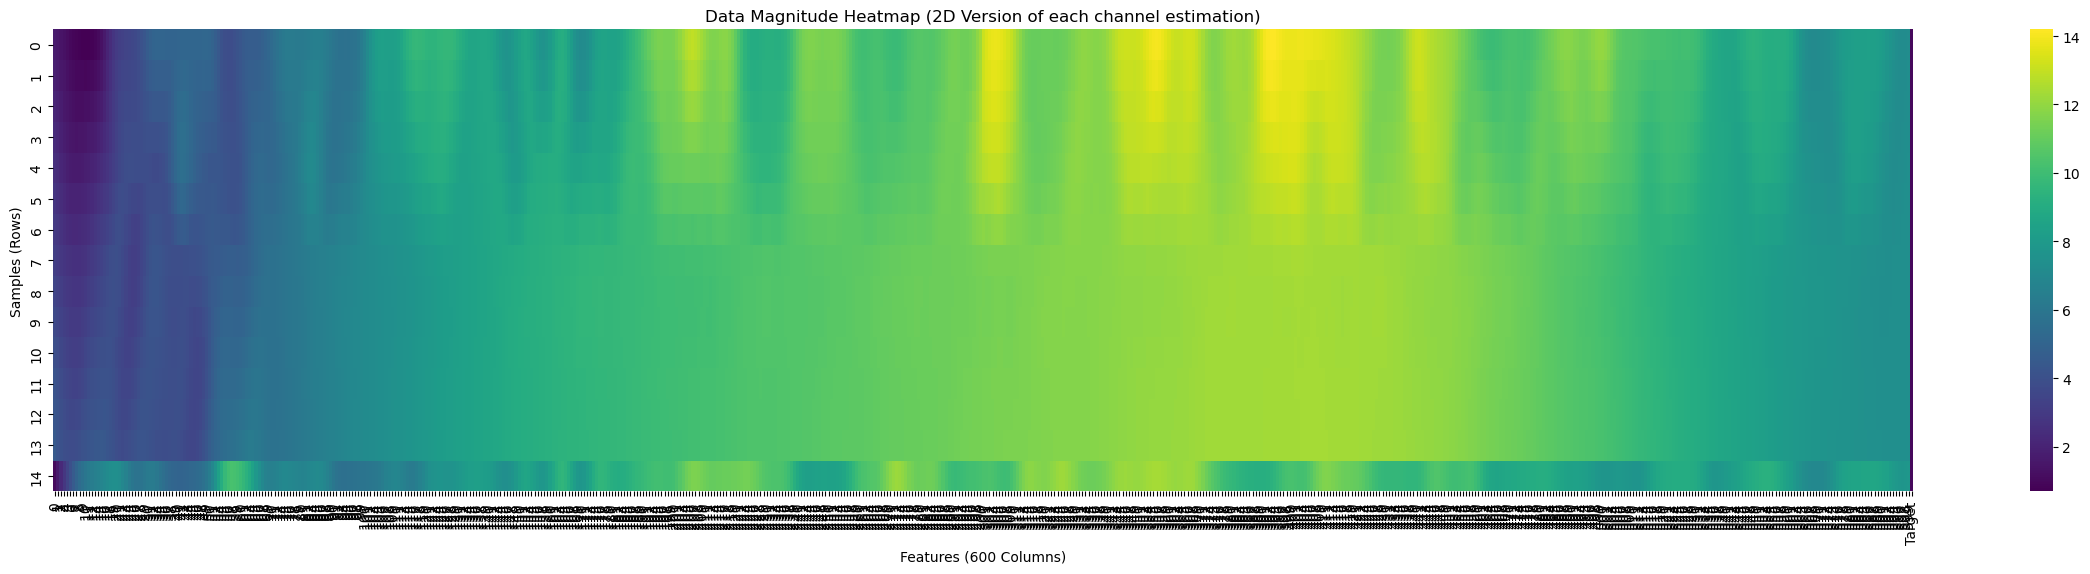

,0,1,2,3,4,5,6,7,8,9,...,591,592,593,594,595,596,597,598,599,Target
0,1.685945,1.548056,1.417662,1.278867,1.130842,0.997035,0.896747,0.832677,0.789831,0.743580,...,8.030896,7.859511,7.667028,7.479887,7.324071,7.225108,7.196849,7.219495,7.267985,1
1,1.875837,1.727935,1.580947,1.435150,1.296020,1.169644,1.071123,1.007349,0.979872,0.966366,...,7.909850,7.744731,7.560805,7.384916,7.251477,7.200222,7.189672,7.224961,7.289834,1
2,2.086509,1.924347,1.751542,1.589275,1.452811,1.335172,1.246175,1.201791,1.193122,1.208199,...,7.751893,7.597786,7.433335,7.288714,7.217304,7.207539,7.221117,7.248950,7.311987,1
3,2.310767,2.125819,1.938774,1.766907,1.624948,1.519102,1.450113,1.425795,1.434762,1.469737,...,7.593535,7.452992,7.326167,7.237219,7.218412,7.233742,7.263241,7.293130,7.331264,1
4,2.532672,2.340745,2.150481,1.976374,1.832624,1.732868,1.681256,1.669255,1.690778,1.739448,...,7.473895,7.346136,7.256387,7.217230,7.218878,7.246983,7.287194,7.325120,7.346326,1
5,2.761875,2.580584,2.395736,2.225491,2.083340,1.993761,1.961600,1.965677,1.990673,2.039684,...,7.388877,7.292235,7.243074,7.230812,7.248972,7.282116,7.322786,7.349656,7.354322,1
6,2.979060,2.813368,2.649309,2.492273,2.379365,2.309587,2.270062,2.270176,2.299326,2.332963,...,7.339247,7.303235,7.289453,7.286487,7.301999,7.332920,7.352304,7.354511,7.354005,1
7,3.204213,3.039798,2.894180,2.775645,2.685342,2.620224,2.578442,2.559883,2.566878,2.608637,...,7.340224,7.334637,7.337532,7.344901,7.352726,7.356983,7.357032,7.355270,7.352237,1
8,3.460678,3.292104,3.131256,2.993058,2.895730,2.827823,2.785218,2.770482,2.798002,2.857148,...,7.326891,7.327391,7.335575,7.347677,7.358255,7.361419,7.360869,7.358140,7.354374,1
9,3.720117,3.540799,3.364926,3.207726,3.090107,3.013480,2.968901,2.963164,3.010232,3.106643,...,7.330980,7.333445,7.342864,7.353727,7.358362,7.360305,7.360936,7.358147,7.354250,1


In [74]:
# Set up the figure
plt.figure(figsize=(30, 6))  # Adjust the figure size as needed
comp_abs_data = complete_data.map(np.abs)

sub_set = comp_abs_data.iloc[:15,:]
# Create the heatmap
sns.heatmap(sub_set, cmap='viridis', xticklabels=True, yticklabels=True, cbar=True)

# Labels and title
plt.xlabel("Features (600 Columns)")
plt.ylabel("Samples (Rows)")
plt.title("Data Magnitude Heatmap (2D Version of each channel estimation)")

# Show the plot
plt.show()
# comp_abs_data.head(10)
sub_set

In [75]:


pca = PCA(n_components=2)
x = np.real(x)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, lab], axis = 1)

finalDf.tail(10)



,principal component 1,principal component 2,Target
2790,5.287590,0.137282,CRG_lab
2791,5.192621,0.132866,CRG_lab
2792,5.090647,0.125801,CRG_lab
2793,4.999865,0.117309,CRG_lab
2794,4.952885,0.109568,CRG_lab
2795,4.918447,0.101646,CRG_lab
2796,4.890672,0.093582,CRG_lab
2797,4.863633,0.085375,CRG_lab
2798,4.829573,0.077157,CRG_lab
2799,4.795569,0.069009,CRG_lab


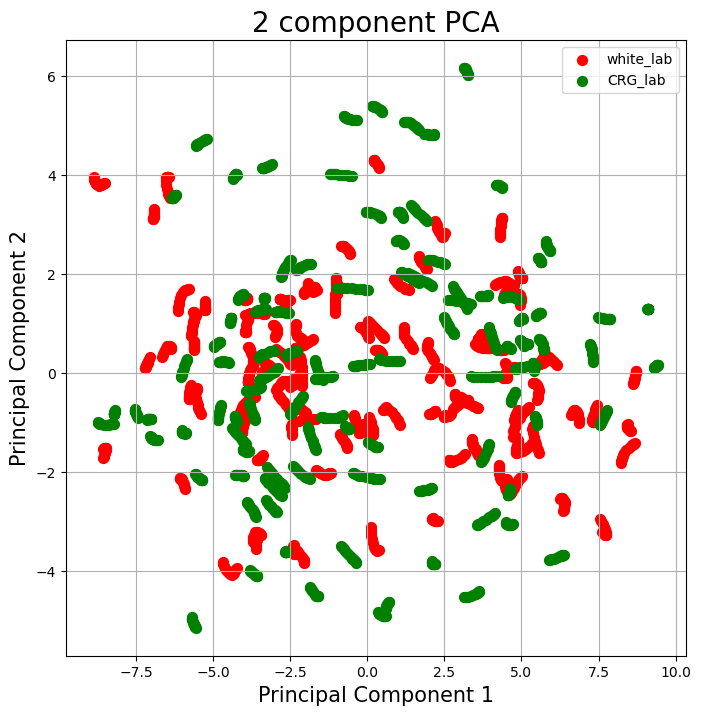

In [76]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['white_lab', 'CRG_lab']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [77]:
dataset_0 = norm_data[norm_data['Target'] == 0]
dataset_1 = norm_data[norm_data['Target'] == 1]

# window = 100
# for i in range(5):
#     dataset_0 = dataset_0.rolling(window=window, axis=0, min_periods=1).mean()
#     dataset_1 =dataset_1.rolling(window=window, axis=0, min_periods=1).mean()

labels_0 = dataset_0.pop('Target')
labels_1 = dataset_1.pop('Target')
dataset_0.head()

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
1400,0.721021-0.166808j,0.720082-0.155440j,0.722121-0.152251j,0.724159-0.148761j,0.724879-0.148077j,0.725205-0.147615j,0.724918-0.147349j,0.724355-0.144321j,0.720277-0.143060j,0.714792-0.142372j,...,0.601815-0.218402j,0.607587-0.216852j,0.614881-0.211620j,0.623122-0.205232j,0.631472-0.198939j,0.639160-0.194167j,0.645834-0.194141j,0.649970-0.196487j,0.653749-0.203756j,0.656831-0.212285j
1401,0.721282-0.167316j,0.720554-0.155591j,0.722681-0.151788j,0.724671-0.147976j,0.725380-0.147083j,0.725692-0.146442j,0.725351-0.146038j,0.724229-0.143057j,0.719549-0.141987j,0.714183-0.141384j,...,0.601010-0.218139j,0.606434-0.216729j,0.613509-0.211566j,0.621601-0.205243j,0.630025-0.199027j,0.638272-0.194215j,0.645251-0.194007j,0.649525-0.196304j,0.653422-0.203548j,0.656614-0.212055j
1402,0.721438-0.168181j,0.720992-0.156043j,0.723407-0.151694j,0.725289-0.147213j,0.725889-0.145971j,0.726087-0.145116j,0.725264-0.144599j,0.723196-0.141627j,0.718137-0.140715j,0.712649-0.140279j,...,0.599690-0.217315j,0.604563-0.216340j,0.611480-0.211427j,0.619731-0.205300j,0.628866-0.199280j,0.637470-0.194398j,0.644822-0.193941j,0.649330-0.196039j,0.653345-0.203208j,0.656611-0.211656j
1403,0.721701-0.169072j,0.721392-0.156696j,0.723965-0.152030j,0.726021-0.146970j,0.726389-0.145208j,0.726245-0.144031j,0.724297-0.143270j,0.721861-0.140178j,0.716857-0.139246j,0.711756-0.138980j,...,0.598447-0.216087j,0.602957-0.215445j,0.609881-0.211000j,0.618600-0.205255j,0.628056-0.199407j,0.636818-0.194554j,0.644377-0.194012j,0.649226-0.195788j,0.653363-0.202798j,0.656683-0.211129j
1404,0.722011-0.169800j,0.721740-0.157305j,0.724374-0.152496j,0.726528-0.147214j,0.726870-0.144988j,0.726008-0.143396j,0.723918-0.142371j,0.721662-0.139061j,0.716936-0.137937j,0.712259-0.137548j,...,0.597880-0.214839j,0.602174-0.214266j,0.609167-0.210203j,0.618140-0.204803j,0.627656-0.199074j,0.636474-0.194304j,0.644100-0.193819j,0.649081-0.195560j,0.653414-0.202344j,0.656852-0.210560j


In [78]:
sc = StandardScaler()

# dataset_0 = sc.fit_transform(dataset_0)
# dataset_1 = sc.fit_transform(dataset_1)

/home/torps/anaconda3/envs/mlenv/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/torps/anaconda3/envs/mlenv/lib/python3.11/site-packages/matplotlib/collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


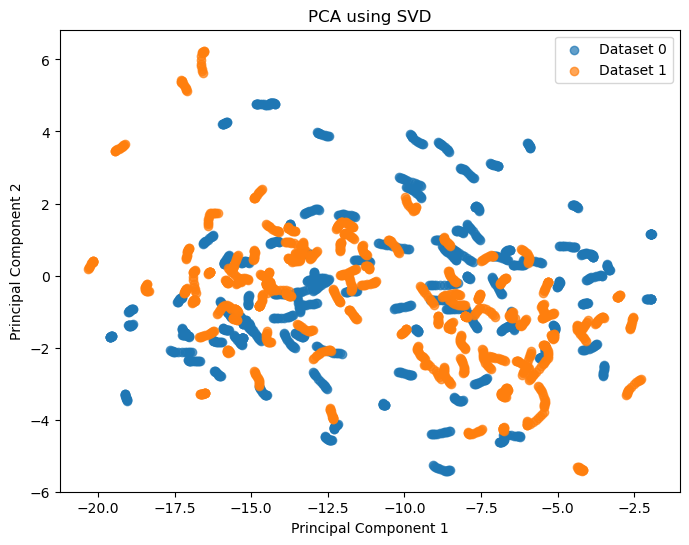

In [79]:
# SVD Analysis

# # Perform Singular Value Decomposition (SVD)
U_0, S_0, Vt_0 = svd(dataset_0, full_matrices=False)
U_1, S_1, Vt_1 = svd(dataset_1, full_matrices=False)

# Project the data onto the principal components (same as PCA)
svd_pca_0 = U_0 @ np.diag(S_0)  # Projection for dataset_0
svd_pca_1 = U_1 @ np.diag(S_1)  # Projection for dataset_1

# Select only the first k principal components (same as PCA reduction)
k = 2  # Number of principal components to retain
principal_components_0 = svd_pca_0[:, :k]
principal_components_1 = svd_pca_1[:, :k]

# Convert to DataFrame for visualization
principal_df_0 = pd.DataFrame(principal_components_0, columns=[f"PC{i+1}" for i in range(k)])
principal_df_1 = pd.DataFrame(principal_components_1, columns=[f"PC{i+1}" for i in range(k)])


# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(principal_df_0["PC1"], principal_df_0["PC2"], label="Dataset 0", alpha=0.7)
plt.scatter(principal_df_1["PC1"], principal_df_1["PC2"], label="Dataset 1", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA using SVD")
plt.legend()
plt.show()


In [80]:
#PCA Analysis

# kpca = KernelPCA(n_components=2, kernel='rbf')  # Radial Basis Function kernel

# principal_components_0 = kpca.fit_transform(dataset_0)
# principal_components_1 = kpca.fit_transform(dataset_1)

# pca_label_0 = pd.DataFrame(data=principal_components_0, columns=['PC1', 'PC2'])
# pca_label_1 = pd.DataFrame(data=principal_components_1, columns=['PC1', 'PC2'])



# # Plot the PCA results
# plt.figure(figsize=(8, 6))
# plt.scatter(pca_label_0['PC1'], pca_label_0['PC2'], label='Label 0', alpha=0.7)
# plt.scatter(pca_label_1['PC1'], pca_label_1['PC2'], label='Label 1', alpha=0.7)
# plt.title('PCA Analysis of Labels 0 and 1')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.legend()
# plt.grid()
# plt.show()
